In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('../plotting.mplstyle')
import h5py
from matplotlib import cm
import numpy as np

blue = "#1f78b4"
green = "#33a02c"
red = "#e31a1c"

In [3]:
# Read data
hfile = h5py.File('./../data/fixed_rate_delayedSFR.hdf','r')

# Read out joint probability distribution data
p_joint = np.array(hfile['result']['probabilities'])
kappa_dcs_2D = np.array(hfile['result']['kappa_dcs_2D'])
kappa_zs_2D = np.array(hfile['result']['kappa_zs_2D'])

# And 1D posteriors, conditional on the other parameter being zero
p_kappa_dc = np.array(hfile['result']['probability_kappa_dc_1D'])
p_kappa_z = np.array(hfile['result']['probability_kappa_z_1D'])
kappa_dcs_1D = np.array(hfile['result']['kappa_dcs_1D'])
kappa_zs_1D = np.array(hfile['result']['kappa_zs_1D'])

# Compute marginal probability distributions
p_kappa_dc_marginal = np.trapz(p_joint,axis=1)
p_kappa_dc_marginal /= np.trapz(p_kappa_dc_marginal,kappa_dcs_2D)

p_kappa_z_marginal = np.trapz(p_joint,axis=0)
p_kappa_z_marginal /= np.trapz(p_kappa_z_marginal,kappa_zs_2D)

/var/folders/b2/tcwq2bcs0214_0cxpktjl4t80000gn/T/ipykernel_18095/1663438754.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  c = ax.pcolormesh(kappa_dcs_2D,kappa_zs_2D,p_joint.T,cmap=cmap,vmin=1e-6,zorder=1)


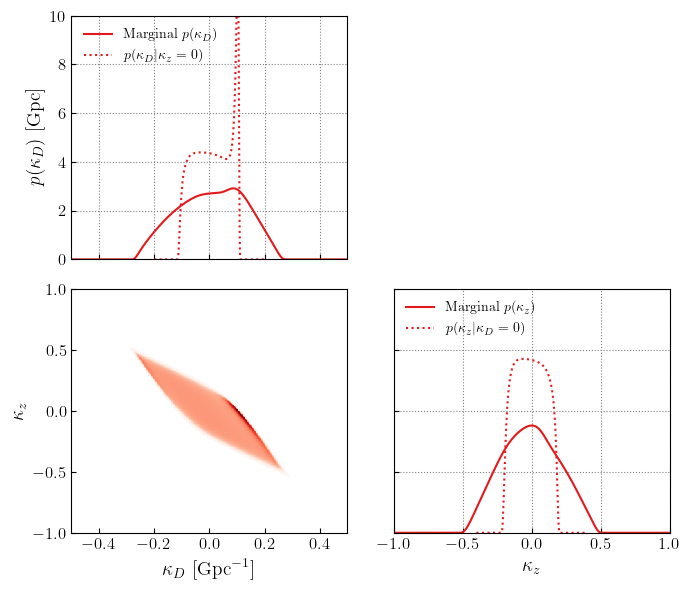

In [4]:
fig = plt.figure(figsize=(7,6))

ax = fig.add_subplot(223)
ax.set_rasterization_zorder(2)
cmap = cm.Reds
cmap.set_under("white")
c = ax.pcolormesh(kappa_dcs_2D,kappa_zs_2D,p_joint.T,cmap=cmap,vmin=1e-6,zorder=1)
ax.set_xlabel('$\kappa_D$ [$\mathrm{Gpc}^{-1}$]')
ax.set_ylabel('$\kappa_z$')
ax.set_xlim(-0.5,0.5)
ax.set_ylim(-1.,1.)

ax = fig.add_subplot(221)
ax.plot(kappa_dcs_2D,p_kappa_dc_marginal,color=red,label="Marginal $p(\kappa_D)$")
ax.plot(kappa_dcs_1D,p_kappa_dc,color=red,ls=':',label="$p(\kappa_D|\kappa_z=0)$")
ax.set_xlim(-0.5,0.5)
ax.set_ylim(0,10)
ax.set_xticklabels([])
ax.set_ylabel('$p(\kappa_D)$ [$\mathrm{Gpc}$]')
ax.legend(fontsize=10,loc='upper left')

ax = fig.add_subplot(224)
ax.plot(kappa_zs_2D,p_kappa_z_marginal,color=red,label="Marginal $p(\kappa_z)$")
ax.plot(kappa_zs_1D,p_kappa_z,color=red,ls=':',label="$p(\kappa_z|\kappa_D=0)$")
ax.set_xlim(-1,1)
ax.set_ylim(0,4)
ax.set_yticklabels([])
ax.set_xlabel('$\kappa_z$')
ax.legend(fontsize=10,loc='upper left')

plt.tight_layout()
plt.savefig('delayedSFR_corner.pdf',bbox_inches='tight',dpi=200)
plt.show()